# Exploratory Data Analysis

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

### Load Data

In [2]:
dialysis = pd.read_csv('Data/capstone2_dialysis_cleaned_data.csv', index_col=0)

### Explore Data

In [3]:
dialysis.head()

Provider Number  Network                  Facility Name  \
0            32647       15             FMC NORTH MOUNTAIN   
1            42595       13     DAVITA POCAHONTAS DIALYSIS   
2            62591       15  DAVITA PLATTE VALLEY DIALYSIS   
3           102816        7      DAVITA MELBOURNE DIALYSIS   
4           112867        6     DAVITA WEST HIRAM DIALYSIS   

          Star Rating Date  Star Rating              Address Line 1  \
0  01/01/2016 - 12/31/2019            4     16605 NORTH 28TH AVENUE   
1  01/01/2016 - 12/31/2019            3                 404 CAMP RD   
2  01/01/2016 - 12/31/2019            5              1321 S 4TH AVE   
3  01/01/2016 - 12/31/2019            2       2235 SOUTH BABCOCK ST   
4  01/01/2016 - 12/31/2019            4  76 HIGHLAND PAVILION COURT   

         City State    Zip    County  ... SWR Category Text  \
0     PHOENIX    AZ  85053  MARICOPA  ...       As Expected   
1  POCAHONTAS    AR  72455  RANDOLPH  ...       As Expected   
2    BRIGHTON    CO  80601     ADAMS  ...       As Expected   
3   MELBOURNE    FL  32901   BREVARD  ...       As Expected   
4       HIRAM    GA  30141  PAULDING  ...       As Expected   

   95% C.I. (Upper Limit) For SWR  95% C.I. (Lower Limit) For SWR  \
0                            2.37                            0.18   
1                            2.37                            0.18   
2                            2.37                            0.18   
3                            1.66                            0.01   
4                            2.37                            0.18   

  Number Of Patients In This Facility For SWR  \
0                                        18.0   
1                                        27.0   
2                                        11.0   
3                                        35.0   
4                                        19.0   

   Standardized First Kidney Transplant Waitlist Ratio  PPPW Category Text  \
0                                               0.82           As Expected   
1                                               0.82           As Expected   
2                                               0.82           As Expected   
3                                               0.30           As Expected   
4                                               0.82           As Expected   

   95% C.I. (Upper Limit) For PPPW  95% C.I. (Lower Limit) For PPPW  \
0                             44.0                              8.8   
1                             49.5                              4.8   
2                             52.1                              7.6   
3                             38.6                              2.2   
4                             45.5                              9.8   

   Number Of Patients For PPPW Percentage Of Prevalent Patients Waitlisted  
0                         93.0                                        21.6  
1                         52.0                                        18.2  
2                         38.0                                        23.1  
3                         66.0                                        10.5  
4                         68.0                                        23.1  

[5 rows x 94 columns]

In [4]:
dialysis.shape

(7724, 94)

In [5]:
dialysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7724 entries, 0 to 7723
Data columns (total 94 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Provider Number                                                                          7724 non-null   int64  
 1   Network                                                                                  7724 non-null   int64  
 2   Facility Name                                                                            7724 non-null   object 
 3   Star Rating Date                                                                         7724 non-null   object 
 4   Star Rating                                                                              7724 non-null   int64  
 5   Address Line 1                                                

In [6]:
dialysis.columns

Index(['Provider Number', 'Network', 'Facility Name', 'Star Rating Date',
       'Star Rating', 'Address Line 1', 'City', 'State', 'Zip', 'County',
       'Phone Number', 'Profit Or Non-Profit', 'Chain Owned',
       'Chain Organization', 'Late Shift', 'Number Of Dialysis Stations',
       'Offers In-Center Hemodialysis', 'Offers Peritoneal Dialysis',
       'Offers Home Hemodialysis Training',
       'Certification Or Recertification Date', 'Claims Date', 'CROWNWeb Date',
       'STrR Date', 'Percentage Of Medicare Patients With Hgb < 10 g/dL',
       'Percentage Of Medicare Patients With Hgb > 12 g/dL',
       'Number Of Dialysis Patients With Hgb Data',
       'Patient Transfusion Category Text',
       'Number Of Patients Included In The Transfusion Summary',
       'Percent Of Adult HD Patients With Kt/V >= 1.2',
       'Adult PD Kt/V Data Availability Code',
       'Pediatric HD Kt/V Data Availability Code',
       'Number Of Adult HD Patients With Kt/V Data',
       'Number Of A

### Thin to Relevant Data Columns
Columns with category text were not included as they are only there to indicate if the data was better, worse or as expected.
Columns with confidence limits were not included as they are just limit the upper and lower confidence limits of the rating's data.
Columns with number of patients were not included as they do not provide any real data just counts of the number of patients used to come up with percentages and rates which are shown in other columns.
Other columns such as zip and phone number were not included as they are just further indicators of facility locations.

In [7]:
dialysis_columns =['Network',
                   'State',
                   'Facility Name',
                   'Star Rating', 
                   'Profit Or Non-Profit', 
                   'Chain Owned',
                   'Chain Organization', 
                   'Late Shift', 
                   'Number Of Dialysis Stations',
                   'Offers In-Center Hemodialysis', 
                   'Offers Peritoneal Dialysis',
                   'Offers Home Hemodialysis Training',
                   'Percentage Of Medicare Patients With Hgb < 10 g/dL',
                   'Percentage Of Medicare Patients With Hgb > 12 g/dL',
                   'Percent Of Adult HD Patients With Kt/V >= 1.2',
                   'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
                   'Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL',
                   'Mortality Rate (Facility)',
                   'Readmission Rate (Facility)',
                   'Hospitalization Rate (Facility)',
                   'Standard Infection Ratio',
                   'Transfusion Rate (Facility)',
                   'Fistula Rate (Facility)',
                   'Percentage Of Adult Patients With Long Term Catheter In Use',
                   'Standardized First Kidney Transplant Waitlist Ratio',
                   'Percentage Of Prevalent Patients Waitlisted']

In [8]:
dialysis = dialysis[dialysis_columns]

In [9]:
dialysis.shape

(7724, 30)

### Correlations

In [10]:
dialysis.corr()

Network  Star Rating  \
Network                                             1.000000     0.076186   
Star Rating                                         0.076186     1.000000   
Profit Or Non-Profit                               -0.006201     0.036526   
Chain Owned                                         0.059628     0.167111   
Late Shift                                          0.005212     0.002530   
Number Of Dialysis Stations                         0.022732    -0.045320   
Offers In-Center Hemodialysis                      -0.031922     0.047891   
Offers Peritoneal Dialysis                         -0.043832    -0.105706   
Offers Home Hemodialysis Training                  -0.076724    -0.057145   
Percentage Of Medicare Patients With Hgb < 10 g/dL -0.118984    -0.257361   
Percentage Of Medicare Patients With Hgb > 12 g/dL  0.030049    -0.018313   
Percent Of Adult HD Patients With Kt/V >= 1.2       0.014551     0.382982   
Percentage Of Adult Patients With Hypercalcemia... -0.024897    -0.293071   
Percentage Of Adult Patients With Serum Phospho... -0.114611    -0.131684   
Percentage Of Adult Patients With Serum Phospho... -0.093071     0.042056   
Percentage Of Adult Patients With Serum Phospho...  0.020020     0.171211   
Percentage Of Adult Patients With Serum Phospho...  0.014549    -0.067847   
Percentage Of Adult Patients With Serum Phospho...  0.119294    -0.058906   
Mortality Rate (Facility)                           0.058205    -0.322756   
Readmission Rate (Facility)                        -0.093470    -0.348549   
Hospitalization Rate (Facility)                    -0.038217    -0.448572   
Standard Infection Ratio                           -0.008322     0.049151   
Transfusion Rate (Facility)                        -0.082089    -0.312218   
Fistula Rate (Facility)                             0.113005     0.576771   
Percentage Of Adult Patients With Long Term Cat... -0.079625    -0.613467   
Standardized First Kidney Transplant Waitlist R... -0.051877     0.061998   
Percentage Of Prevalent Patients Waitlisted        -0.005660     0.063817   

                                                    Profit Or Non-Profit  \
Network                                                        -0.006201   
Star Rating                                                     0.036526   
Profit Or Non-Profit                                            1.000000   
Chain Owned                                                     0.316153   
Late Shift                                                     -0.049418   
Number Of Dialysis Stations                                     0.038907   
Offers In-Center Hemodialysis                                  -0.012250   
Offers Peritoneal Dialysis                                      0.017800   
Offers Home Hemodialysis Training                               0.037774   
Percentage Of Medicare Patients With Hgb < 10 g/dL              0.090448   
Percentage Of Medicare Patients With Hgb > 12 g/dL             -0.096463   
Percent Of Adult HD Patients With Kt/V >= 1.2                   0.075739   
Percentage Of Adult Patients With Hypercalcemia...             -0.046463   
Percentage Of Adult Patients With Serum Phospho...             -0.021254   
Percentage Of Adult Patients With Serum Phospho...             -0.007970   
Percentage Of Adult Patients With Serum Phospho...              0.159414   
Percentage Of Adult Patients With Serum Phospho...             -0.170897   
Percentage Of Adult Patients With Serum Phospho...              0.037328   
Mortality Rate (Facility)                                       0.010228   
Readmission Rate (Facility)                                     0.059979   
Hospitalization Rate (Facility)                                 0.101226   
Standard Infection Ratio                                       -0.076605   
Transfusion Rate (Facility)                                     0.030776   
Fistula Rate (Facility)                                        -0.006889

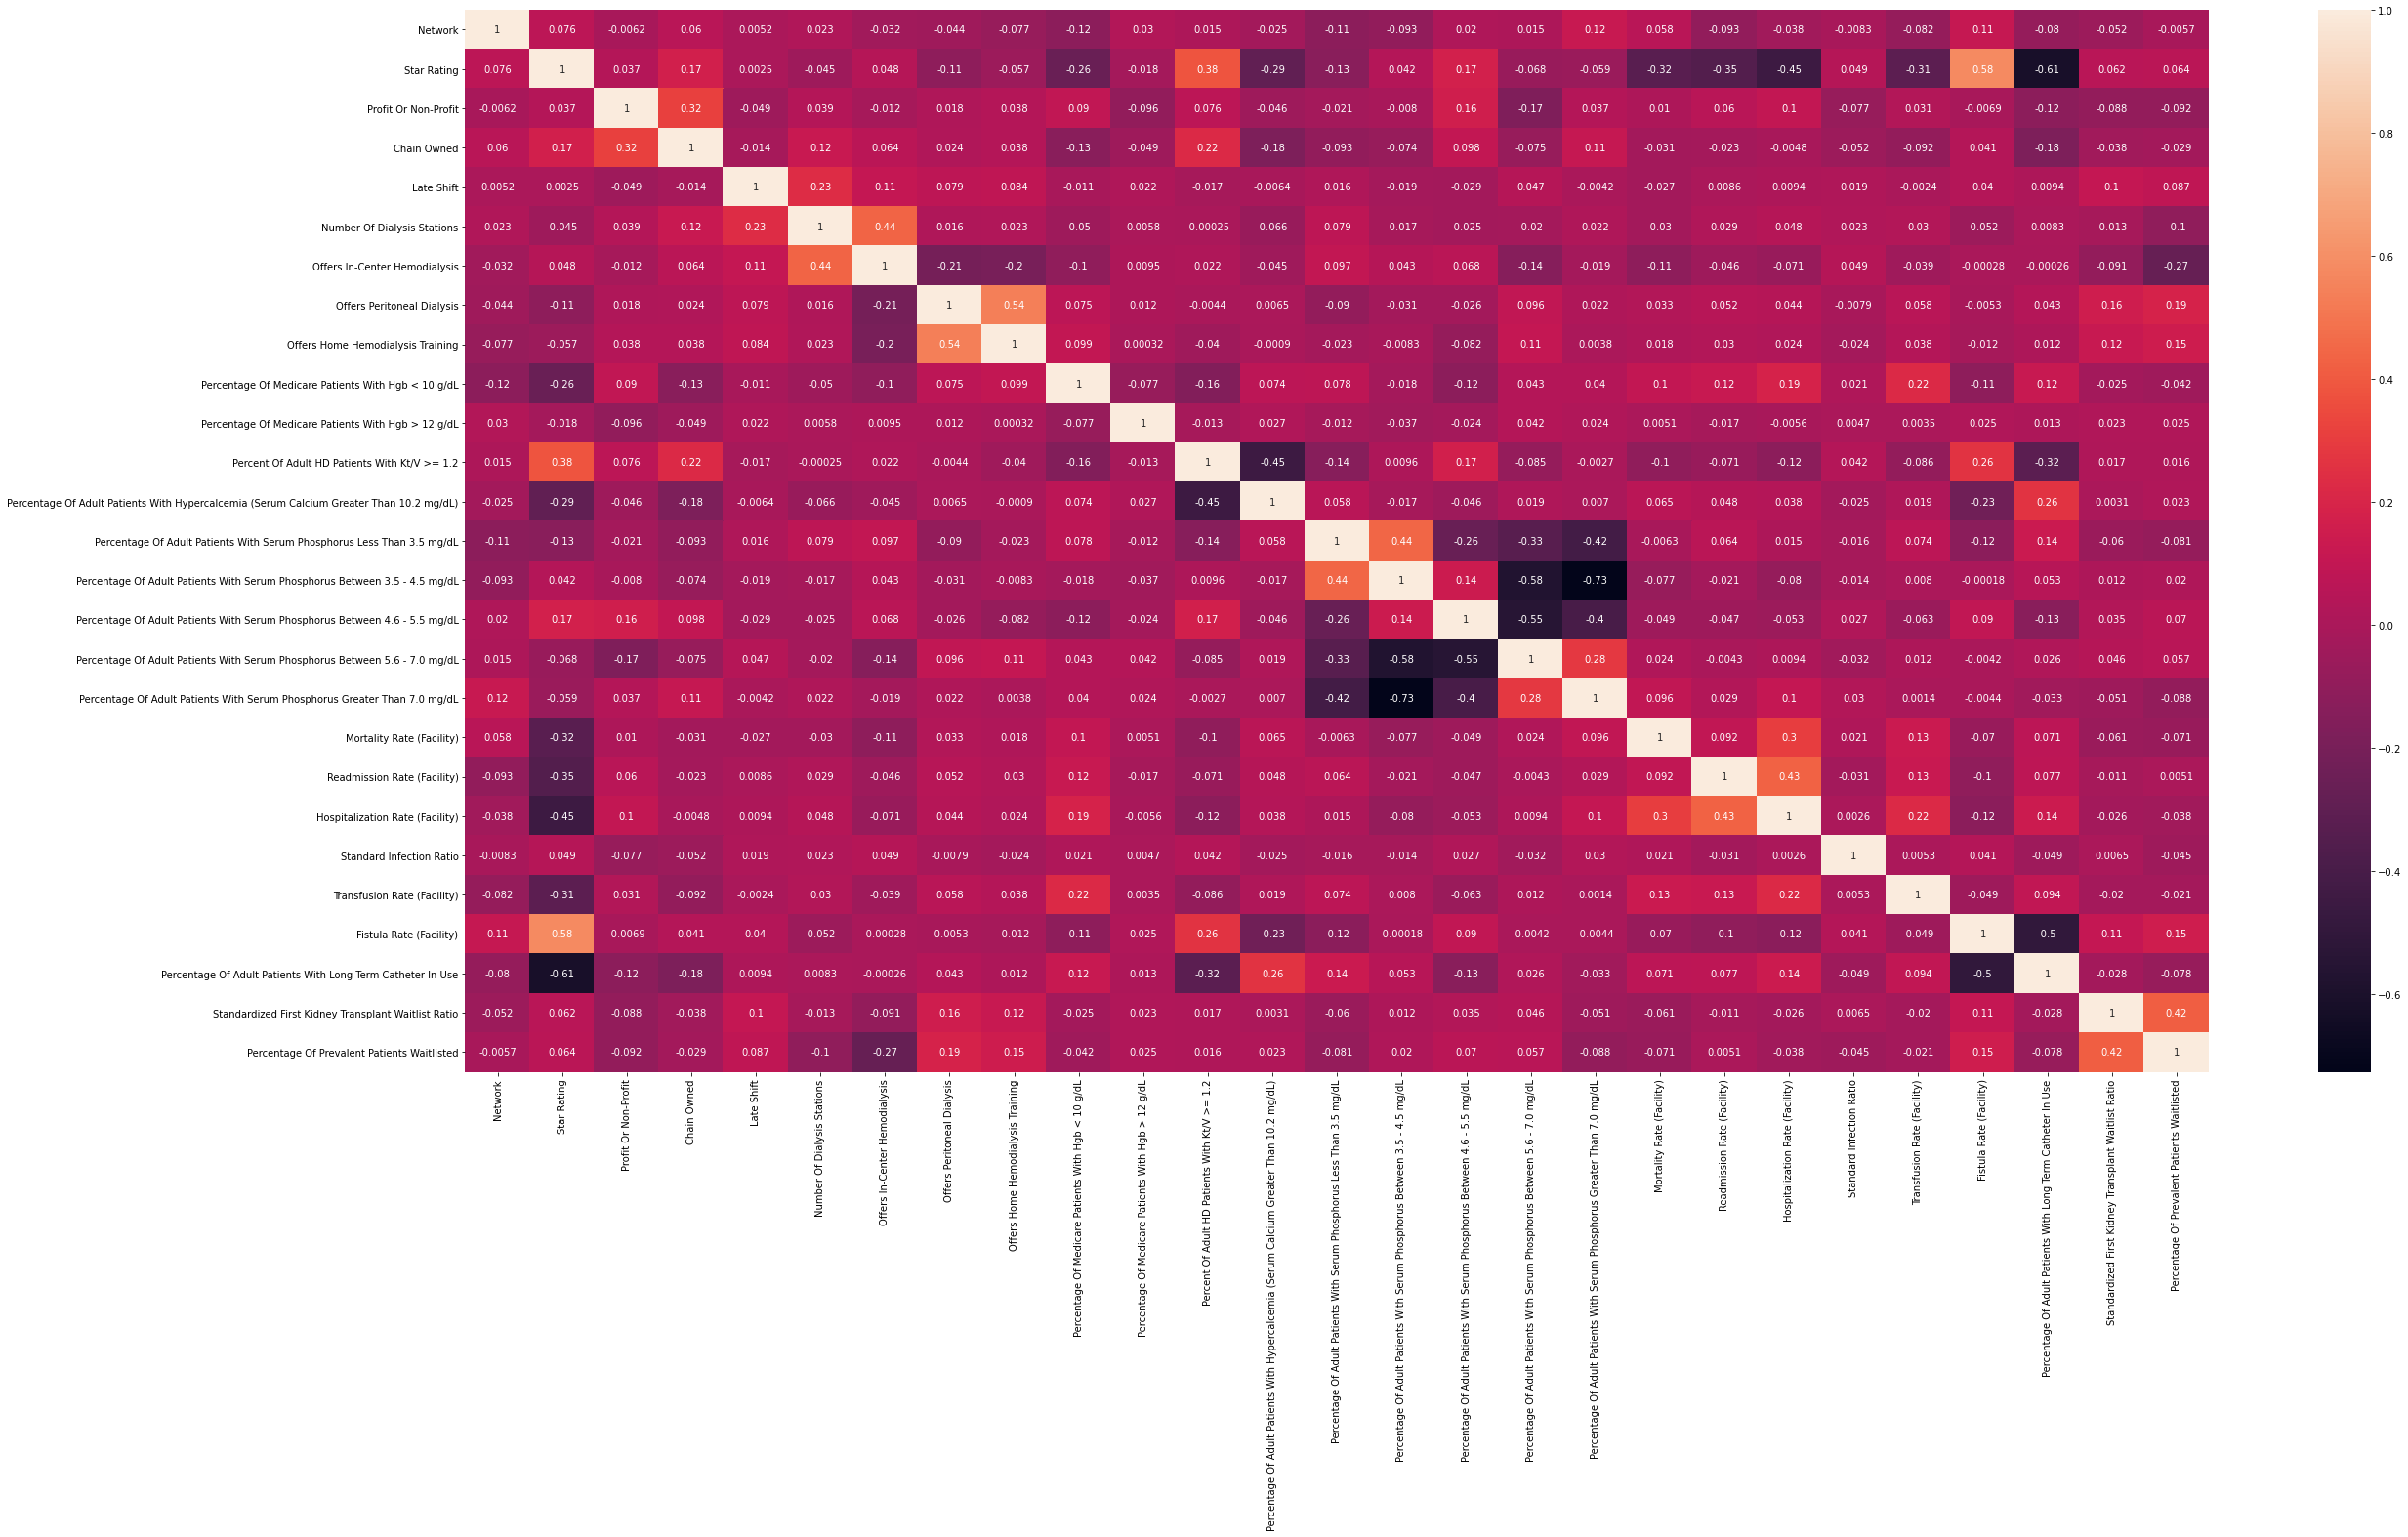

In [11]:
plt.figure(figsize=(40,20))
dialysis_heatmap = sns.heatmap(dialysis.corr(), annot=True)

#### Moderate Correlations (0.3-0.7)

**-0.3** : Transfusion Rate (Facility) & Star Rating

**0.32** : Chain Owned & Profit or Non-Profit

**-0.32** : Mortality Rate (Facility) & Star Rating

**-0.32** : Readmission Rate (Facility) & Star Rating

**-0.33** : Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL

**0.34** : Percent Of Adult HD Patients With Kt/V >= 1.2 & Star Rating

**-0.34** : Percentage Of Adult Patients With Long Term Catheter In Use & Percent Of Adult HD Patients With Kt/V >= 1.2

**-0.39** : Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL

**-0.39** : Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL

**0.4** : Percentage Of Adult Patients With Serum Phosphorus Between 3.5 & 4.5 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL

**0.42** : Hospitalization Rate (Facility) & Readmission Rate (Facility)

**0.43** : Percentage Of Prevalent Patients Waitlisted & Standardized First Kidney Transplant Waitlist Ratio

**-0.43** : Hospitalization Rate (Facility) & Star Rating

**0.44** : Offers In-Center Hemodialysis & Number of Dialysis Stations

**-0.47** : Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL) & Percent Of Adult HD Patients With Kt/V >= 1.2

**-0.5** : Percentage Of Adult Patients With Long Term Catheter In Use & Fistula Rate (Facility)

**0.51** : Fistula Rate (Facility) & Star Rating

**-0.53** : Percentage Of Adult Patients With Long Term Catheter In Use & Star Rating

**-0.55** : Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL

**-0.59** : Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL & Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL

#### Strong Correlation(>0.7)
**-0.71** : Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL - Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL

### Strong Correlations

#### Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL
Corr: -0.71

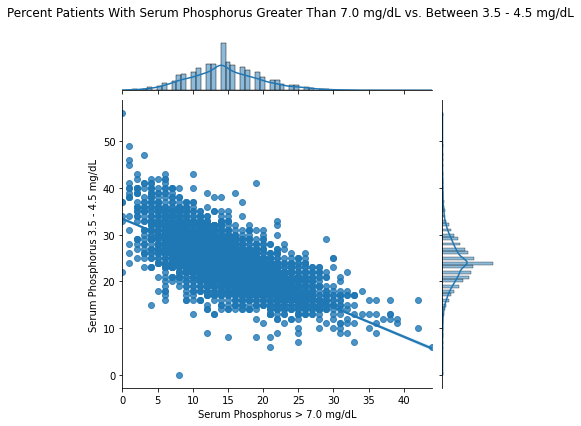

In [12]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL', data=dialysis, kind='reg')
_ = plt.xlabel('Serum Phosphorus > 7.0 mg/dL')
_ = plt.ylabel('Serum Phosphorus 3.5 - 4.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percent Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Between 3.5 - 4.5 mg/dL')
# Patients refers only to adult patients

### Moderate Correlations (0.3-0.7)

In [13]:
# Create dataframe with only the columns found to have a moderate correlation
dialysis_modcorr_columns =['Star Rating', 
                   'Profit Or Non-Profit', 
                   'Chain Owned',
                   'Number Of Dialysis Stations',
                   'Offers In-Center Hemodialysis', 
                   'Percent Of Adult HD Patients With Kt/V >= 1.2',
                   'Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)',
                   'Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL',
                   'Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL',
                   'Mortality Rate (Facility)',
                   'Readmission Rate (Facility)',
                   'Hospitalization Rate (Facility)',
                   'Transfusion Rate (Facility)',
                   'Fistula Rate (Facility)',
                   'Percentage Of Adult Patients With Long Term Catheter In Use',
                   'Standardized First Kidney Transplant Waitlist Ratio',
                   'Percentage Of Prevalent Patients Waitlisted']
dialysis_modcorr = dialysis[dialysis_modcorr_columns]

<Figure size 2880x1440 with 0 Axes>

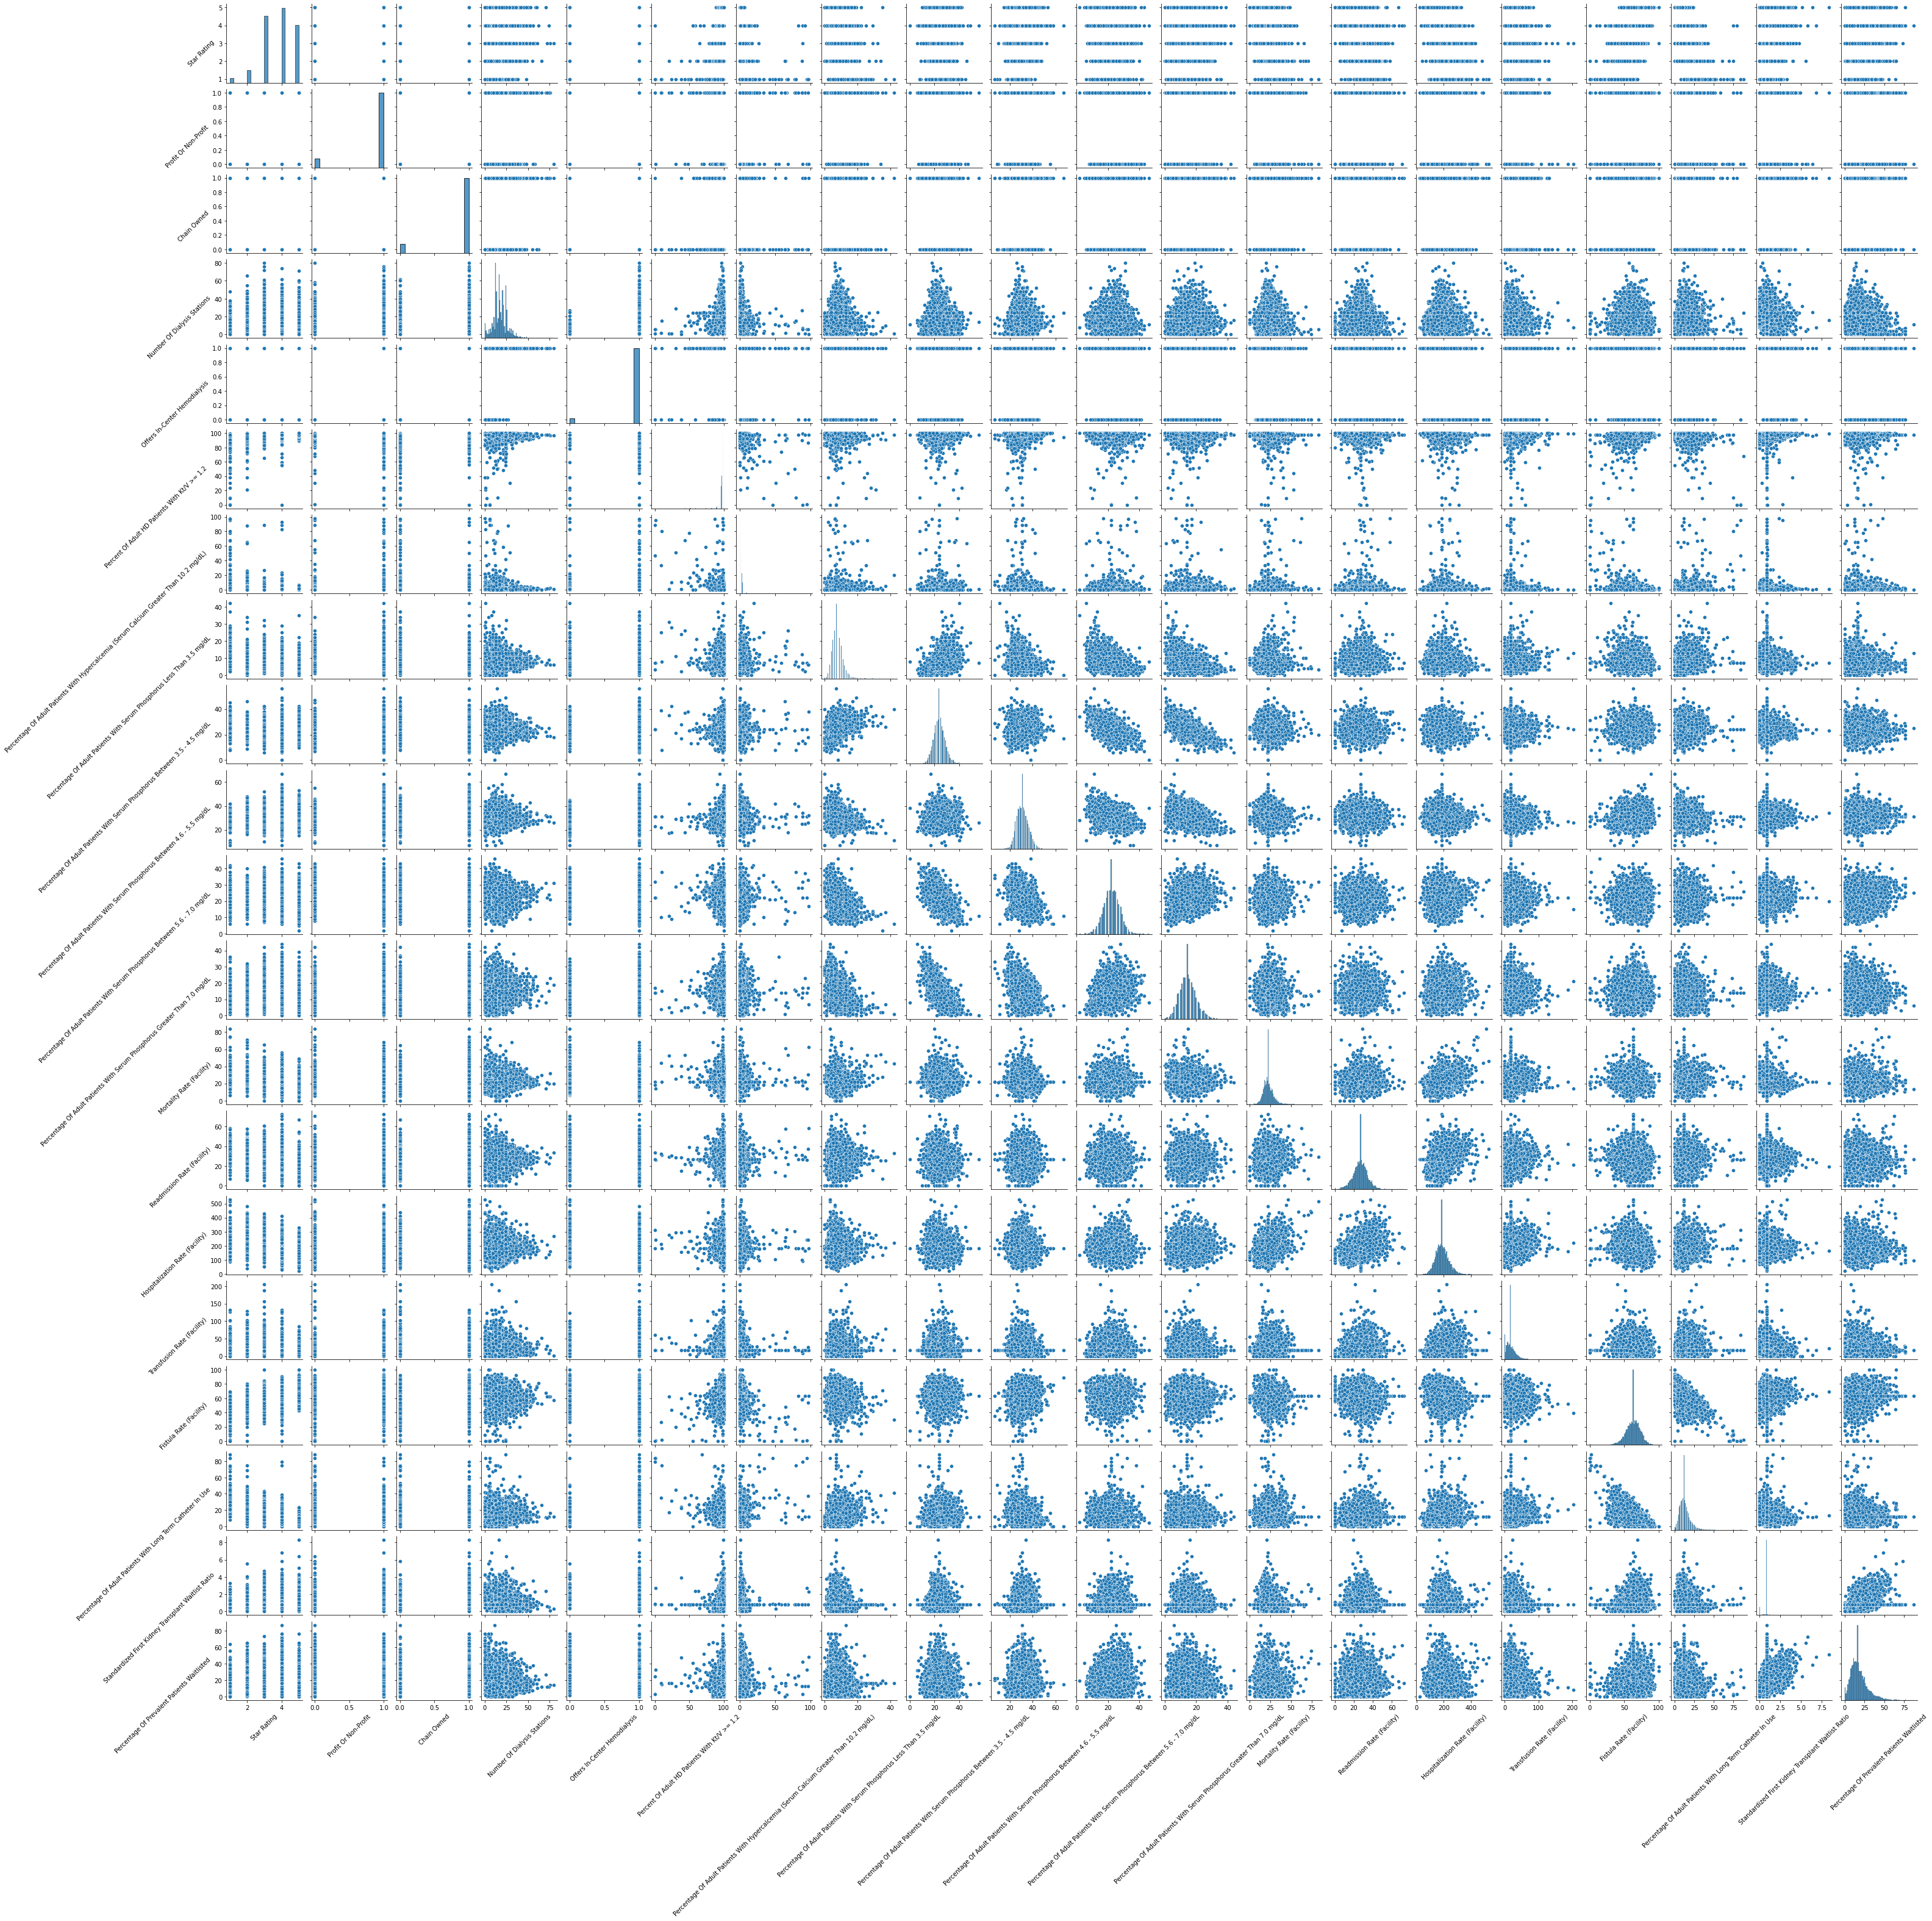

In [14]:
# Use dataframe with moderate correlation columns to create a pair plot
plt.figure(figsize=(40,20))
dialysis_pairplot = sns.pairplot(dialysis_modcorr, height=2)

# Rotate label names
for ax in dialysis_pairplot.axes.flatten():
    # rotate x axis labels
    ax.set_xlabel(ax.get_xlabel(), rotation = 45)
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 45)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')
plt.show()

### Individual look at moderate correlations
- Correlations between two continuous variables will use sns.jointplot() with kind='reg'

- Correlations between one discrete variable and one continous variable will use sns.boxplot()

- Correlations between two discrete variables will use sns.countplot()

*Correlations are listed from strongest to weakest*

#### Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL
Corr: -0.59

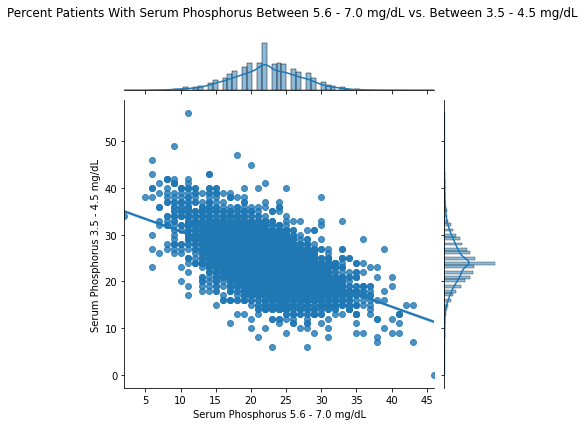

In [15]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('Serum Phosphorus 5.6 - 7.0 mg/dL')
_ = plt.ylabel('Serum Phosphorus 3.5 - 4.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percent Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Between 3.5 - 4.5 mg/dL')
# Patients refers only to adult patients

#### Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL
Corr: -0.55

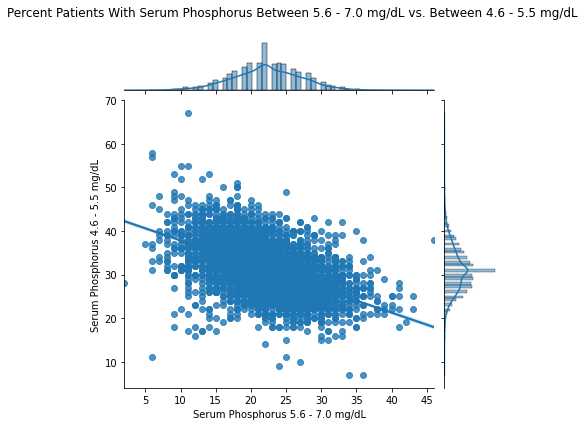

In [16]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('Serum Phosphorus 5.6 - 7.0 mg/dL')
_ = plt.ylabel('Serum Phosphorus 4.6 - 5.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percent Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Between 4.6 - 5.5 mg/dL')
# Patients refers only to adult patients

#### Star Rating vs. Percentage Of Adult Patients With Long Term Catheter In Use
Corr: -0.53

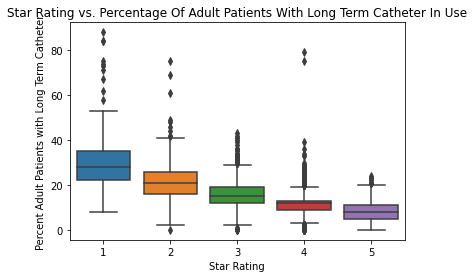

In [17]:
_ = sns.boxplot(x='Star Rating', y='Percentage Of Adult Patients With Long Term Catheter In Use', data=dialysis)
_ = plt.ylabel('Percent Adult Patients with Long Term Catheter')
_ = plt.title('Star Rating vs. Percentage Of Adult Patients With Long Term Catheter In Use')

#### Star Rating vs. Fistula Rate (Facility)
Corr: 0.51

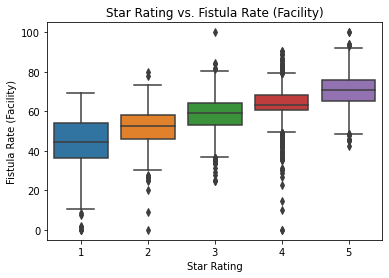

In [18]:
_ = sns.boxplot(x='Star Rating', y='Fistula Rate (Facility)', data=dialysis)
_ = plt.title('Star Rating vs. Fistula Rate (Facility)')

#### Percentage Of Adult Patients With Long Term Catheter In Use vs. Fistula Rate (Facility)
Corr: -0.5

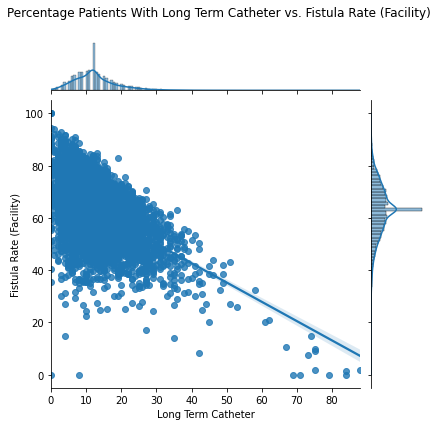

In [19]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Long Term Catheter In Use', y='Fistula Rate (Facility)', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Patients With Long Term Catheter vs. Fistula Rate (Facility)')
_ = plt.xlabel('Long Term Catheter')
# Patients refers only to adult patients

#### Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL) vs. Percent Of Adult HD Patients With Kt/V >= 1.2
Corr: -0.47

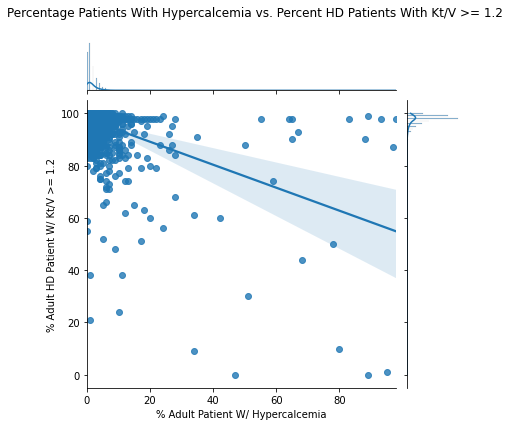

In [20]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL)', y='Percent Of Adult HD Patients With Kt/V >= 1.2', data=dialysis, kind="reg")
_ = plt.xlabel('% Adult Patient W/ Hypercalcemia')
_ = plt.ylabel('% Adult HD Patient W/ Kt/V >= 1.2')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Patients With Hypercalcemia vs. Percent HD Patients With Kt/V >= 1.2')
# Patients refers only to adult patients
# Hypercalcemia = Serum Calcium Greater Than 10.2 mg/dL

#### Offers In-Center Hemodialysis vs. Number Of Dialysis Stations
Corr: 0.44

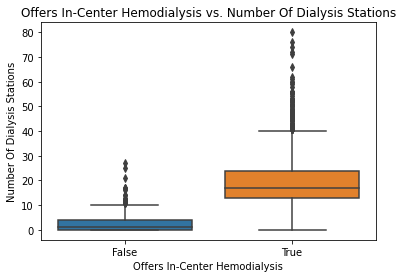

In [21]:
_ = sns.boxplot(x='Offers In-Center Hemodialysis', y='Number Of Dialysis Stations', data=dialysis)
_ = _.set_xticklabels( ('False', 'True') )
_ = plt.title('Offers In-Center Hemodialysis vs. Number Of Dialysis Stations')

#### Star Rating vs. Hospitalization Rate (Facility)
Corr: -0.43

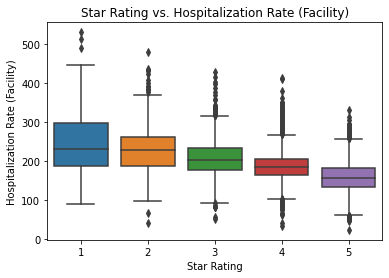

In [22]:
_ = sns.boxplot(x='Star Rating', y='Hospitalization Rate (Facility)', data=dialysis)
_ = plt.title('Star Rating vs. Hospitalization Rate (Facility)')

#### Percentage Of Prevalent Patients Waitlisted vs. Standardized First Kidney Transplant Waitlist Ratio
Corr: 0.43

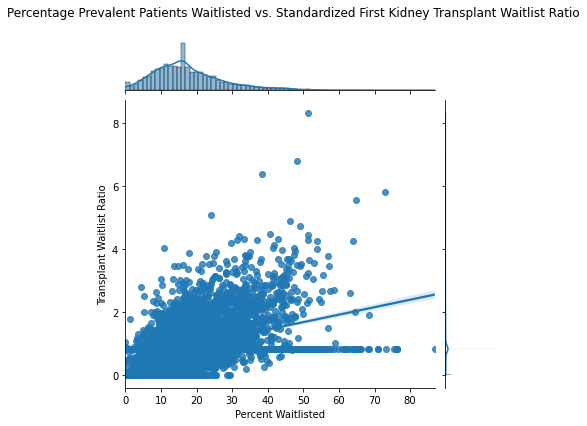

In [23]:
_ = sns.jointplot(x='Percentage Of Prevalent Patients Waitlisted', y='Standardized First Kidney Transplant Waitlist Ratio', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Prevalent Patients Waitlisted vs. Standardized First Kidney Transplant Waitlist Ratio')
_ = plt.xlabel('Percent Waitlisted')
_ = plt.ylabel('Transplant Waitlist Ratio')

#### Hospitalization Rate (Facility) vs. Readmission Rate (Facility)
Corr: 0.42

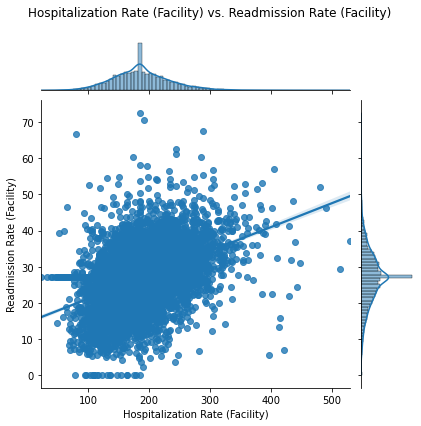

In [24]:
_ = sns.jointplot(x='Hospitalization Rate (Facility)', y='Readmission Rate (Facility)', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Hospitalization Rate (Facility) vs. Readmission Rate (Facility)')

#### Percentage Of Adult Patients With Serum Phosphorus Between 3.5 & 4.5 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL
Corr: 0.4

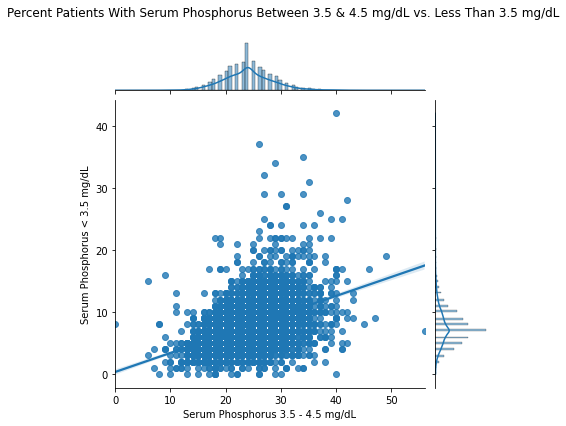

In [25]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Between 3.5 - 4.5 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('Serum Phosphorus 3.5 - 4.5 mg/dL')
_ = plt.ylabel('Serum Phosphorus < 3.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percent Patients With Serum Phosphorus Between 3.5 & 4.5 mg/dL vs. Less Than 3.5 mg/dL')
# Patients refers only to adult patients

#### Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL
Corr: -0.39

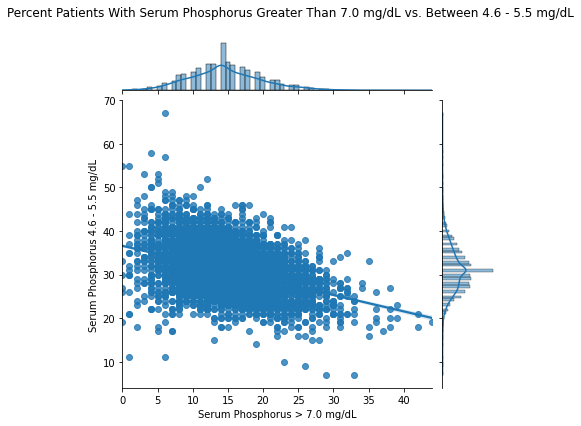

In [26]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Between 4.6 - 5.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('Serum Phosphorus > 7.0 mg/dL')
_ = plt.ylabel('Serum Phosphorus 4.6 - 5.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percent Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Between 4.6 - 5.5 mg/dL')
# Patients refers only to adult patients

#### Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL
Corr: -0.39

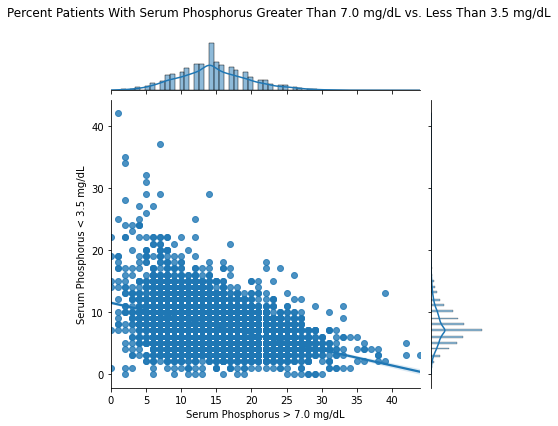

In [27]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Greater Than 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('Serum Phosphorus > 7.0 mg/dL')
_ = plt.ylabel('Serum Phosphorus < 3.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percent Patients With Serum Phosphorus Greater Than 7.0 mg/dL vs. Less Than 3.5 mg/dL')

#### Percentage Of Adult Patients With Long Term Catheter In Use vs. Percent Of Adult HD Patients With Kt/V >= 1.2
Corr: -0.34

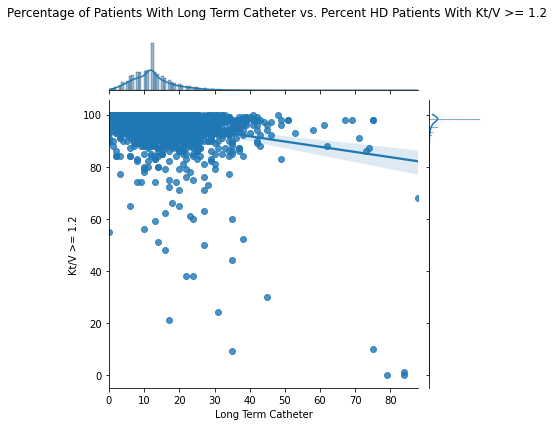

In [28]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Long Term Catheter In Use', y='Percent Of Adult HD Patients With Kt/V >= 1.2', data=dialysis, kind="reg")
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage of Patients With Long Term Catheter vs. Percent HD Patients With Kt/V >= 1.2')
_ = plt.xlabel('Long Term Catheter')
_ = plt.ylabel('Kt/V >= 1.2')
# Patient refers to adult patients only

#### Star Rating vs. Percent Of Adult HD Patients With Kt/V >= 1.2
Corr: 0.34

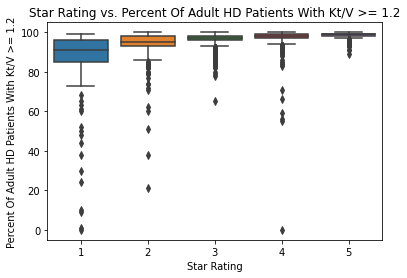

In [29]:
_ = sns.boxplot(x='Star Rating', y='Percent Of Adult HD Patients With Kt/V >= 1.2', data=dialysis)
_ = plt.title('Star Rating vs. Percent Of Adult HD Patients With Kt/V >= 1.2')

#### Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL
Corr: -0.33

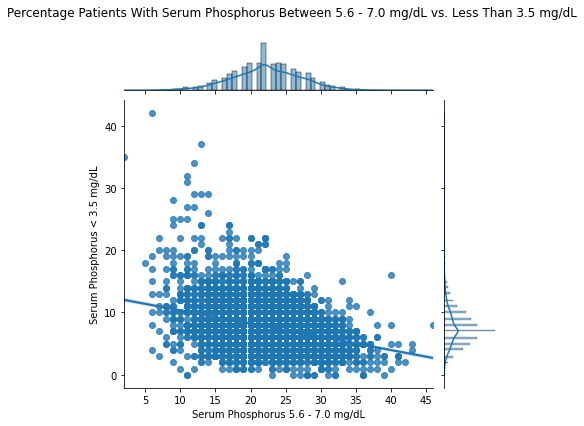

In [30]:
_ = sns.jointplot(x='Percentage Of Adult Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL', y='Percentage Of Adult Patients With Serum Phosphorus Less Than 3.5 mg/dL', data=dialysis, kind="reg")
_ = plt.xlabel('Serum Phosphorus 5.6 - 7.0 mg/dL')
_ = plt.ylabel('Serum Phosphorus < 3.5 mg/dL')
_ = plt.subplots_adjust(top=0.9)
_ = plt.suptitle('Percentage Patients With Serum Phosphorus Between 5.6 - 7.0 mg/dL vs. Less Than 3.5 mg/dL')
# Patients refers only to adult patients

#### Star Rating vs. Readmission Rate (Facility)
Corr: -0.32

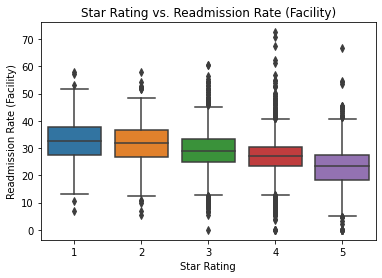

In [31]:
_ = sns.boxplot(x='Star Rating', y='Readmission Rate (Facility)', data=dialysis)
_ = plt.title('Star Rating vs. Readmission Rate (Facility)')

#### Star Rating vs. Mortality Rate (Facility)
Corr: -0.32

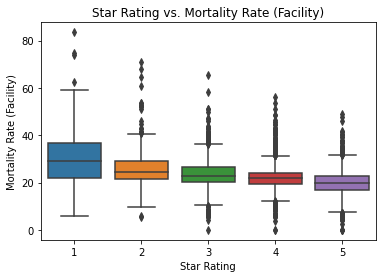

In [32]:
_ = sns.boxplot(x='Star Rating', y='Mortality Rate (Facility)', data=dialysis)
_ = plt.title('Star Rating vs. Mortality Rate (Facility)')

#### Chain Owned vs. Profit Or Non-Profit
Corr: 0.32

/Users/nicholehartz/opt/anaconda3/envs/TestEnv/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


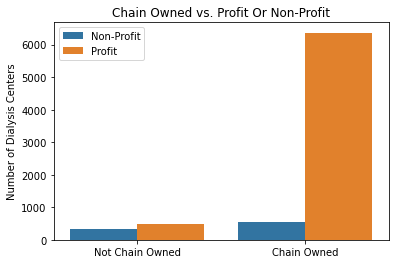

In [33]:
_ = sns.countplot('Chain Owned', hue='Profit Or Non-Profit', data=dialysis)
_ = plt.title('Chain Owned vs. Profit Or Non-Profit')
_ = plt.xlabel('')
_ = plt.ylabel('Number of Dialysis Centers')
_ = plt.xticks([0,1],['Not Chain Owned', 'Chain Owned'])
_ = plt.legend(('Non-Profit', 'Profit'))

#### Star Rating vs. Transfusion Rate (Facility)
Corr: -0.3

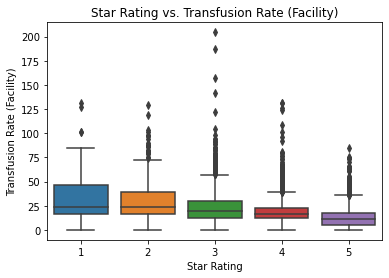

In [34]:
_ = sns.boxplot(x='Star Rating', y='Transfusion Rate (Facility)', data=dialysis)
_ = plt.title('Star Rating vs. Transfusion Rate (Facility)')

### Star Rating vs Profit Or Non-Profit
Although it has a low correlation, wanted to look at the data visually.

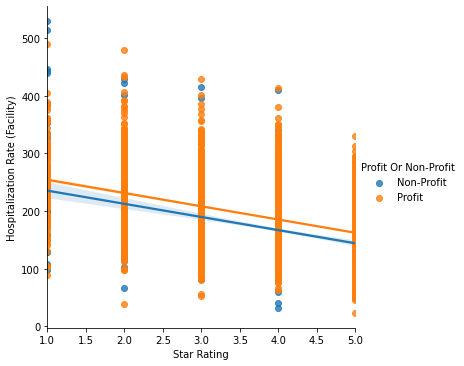

In [35]:
_ = sns.lmplot(x='Star Rating', y='Hospitalization Rate (Facility)', hue='Profit Or Non-Profit', data=dialysis)
new_labels = ['Non-Profit', 'Profit']
for t, l in zip(_._legend.texts, new_labels): t.set_text(l)

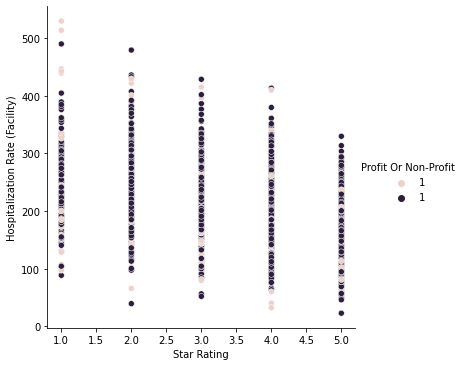

In [36]:
_ = sns.relplot(x='Star Rating', y='Hospitalization Rate (Facility)', hue='Profit Or Non-Profit', data=dialysis)
new_labels = ['Non-Profit', 'Profit']
for t, l in zip(_._legend.texts, new_labels): t.set_text(1)

There does not seem to be any signifcant difference between a dialysis center's profit status and it's star rating.

### State vs Patient Health Indicators

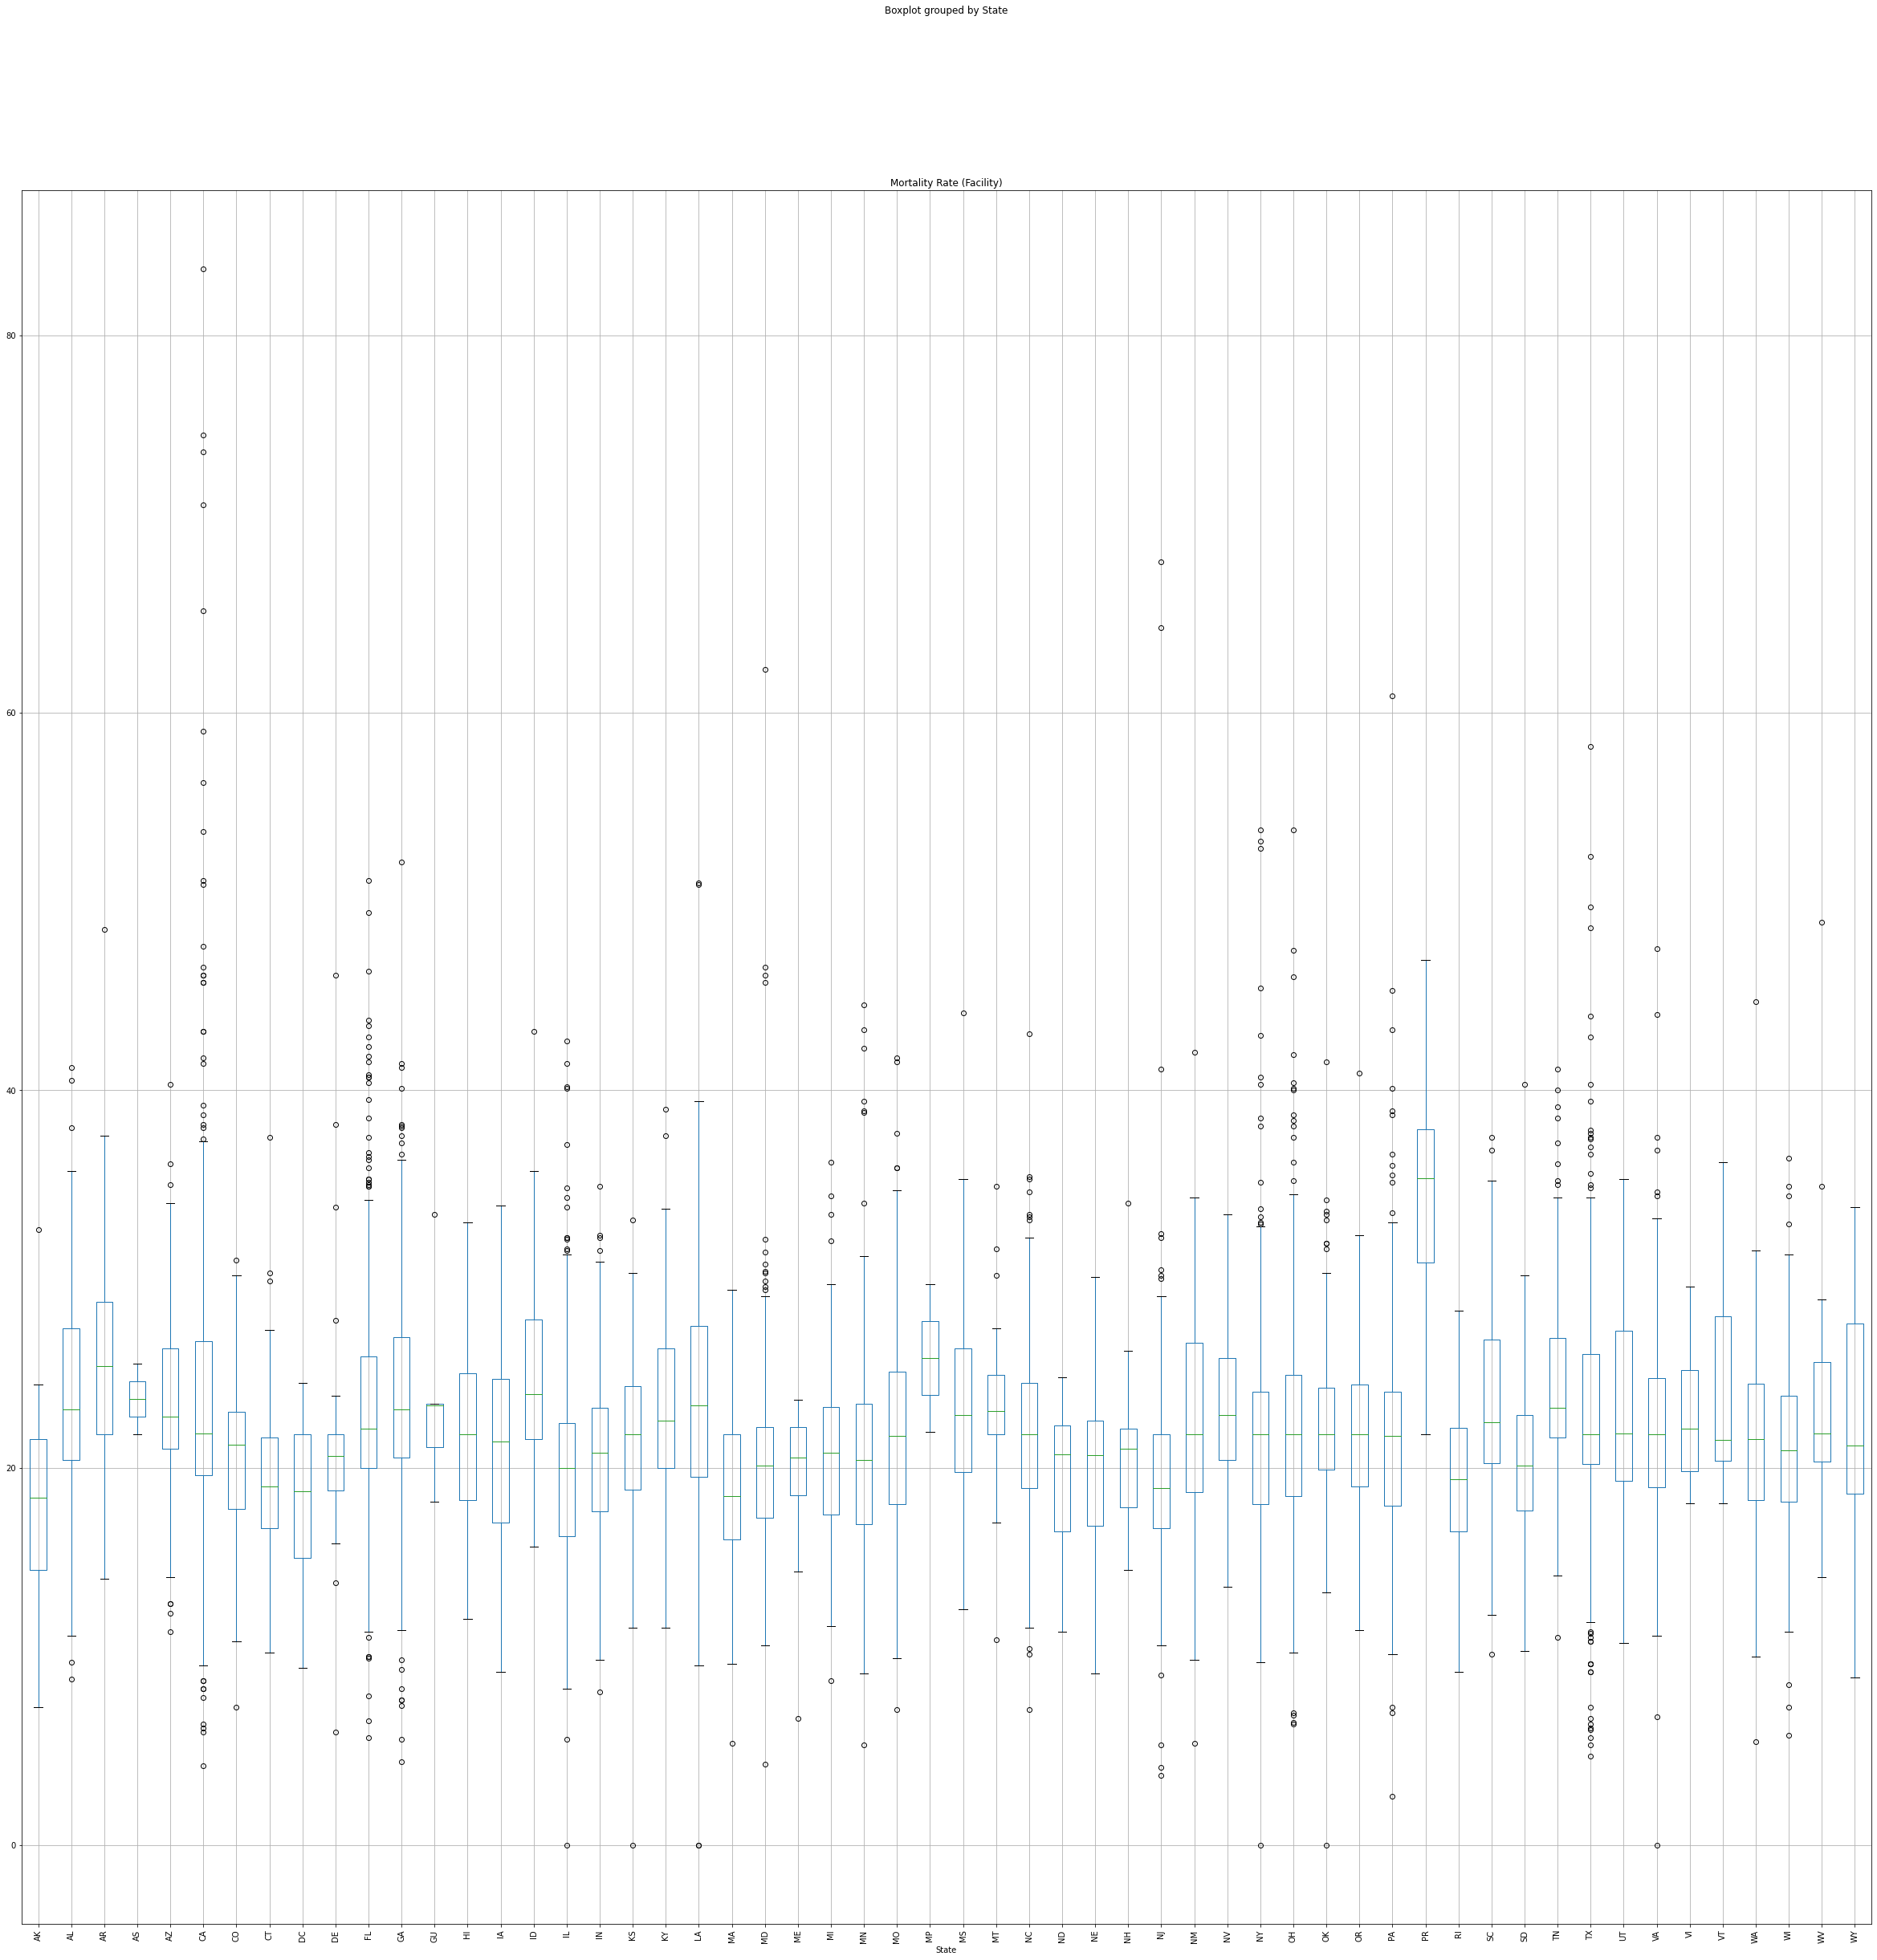

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(40,40))
_ = dialysis.boxplot('Mortality Rate (Facility)', 'State',  rot=90, ax=ax)

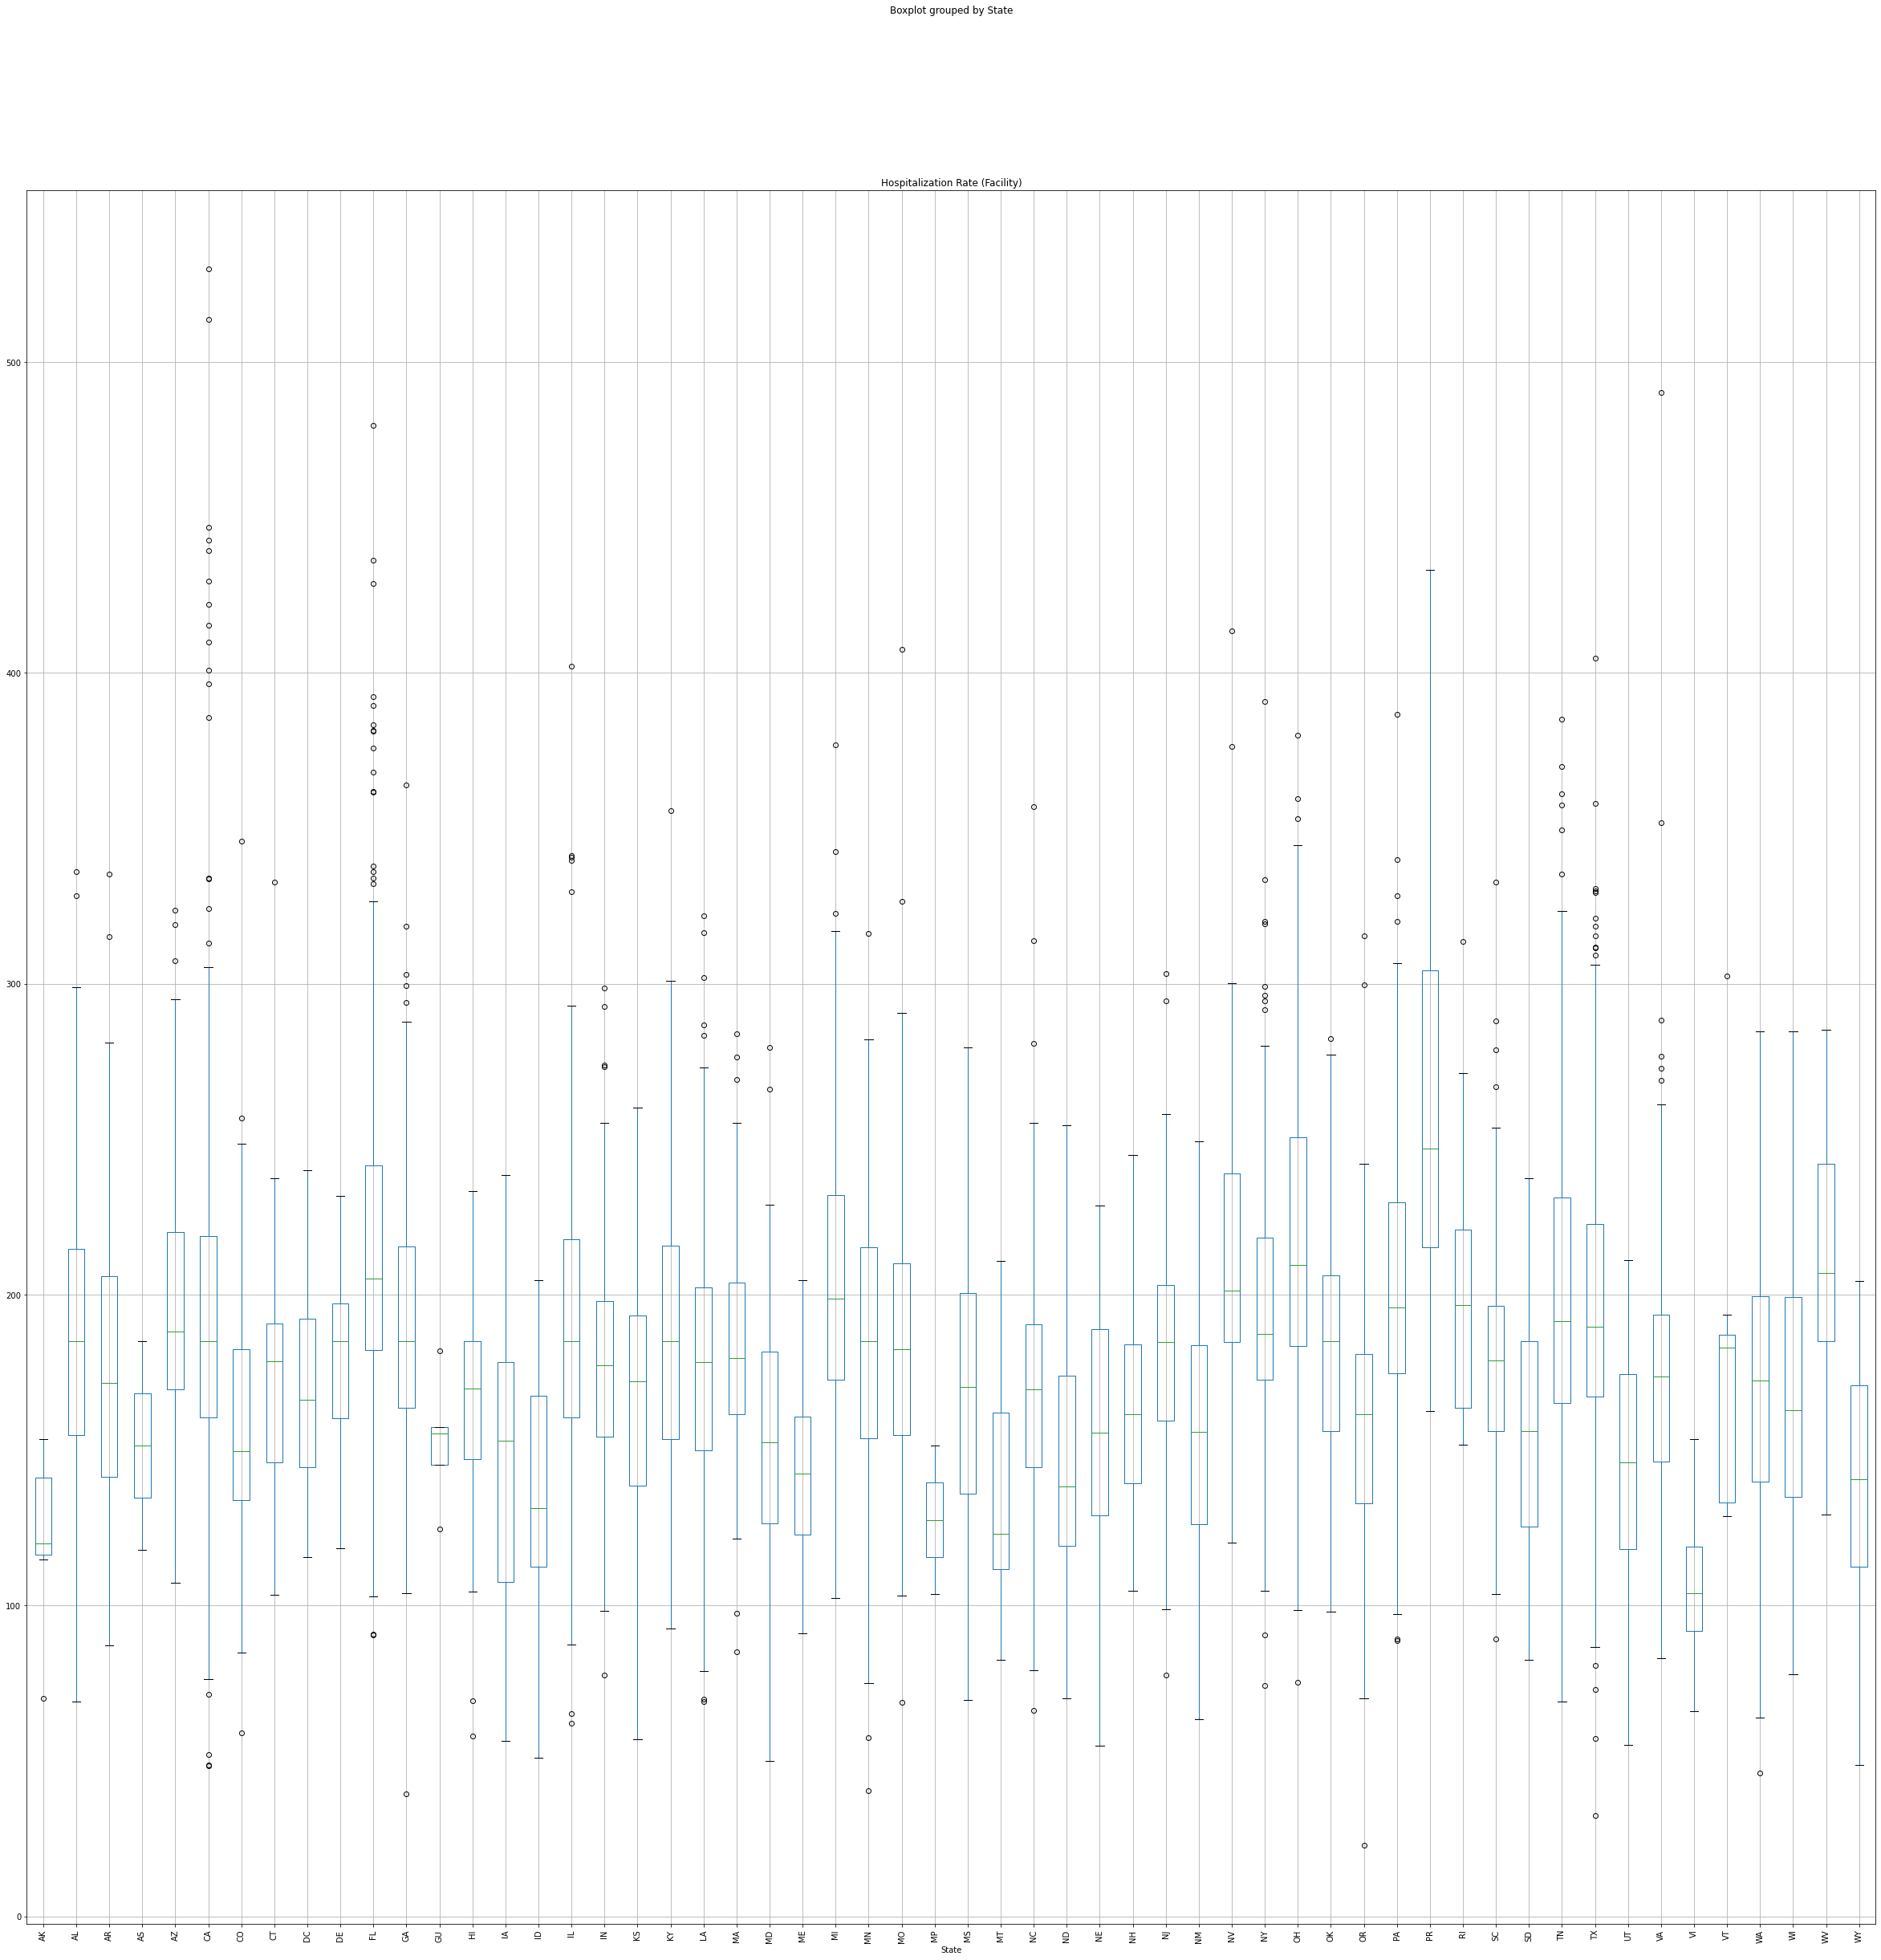

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(40,40))
_ = dialysis.boxplot('Hospitalization Rate (Facility)', 'State',  rot=90, ax=ax)

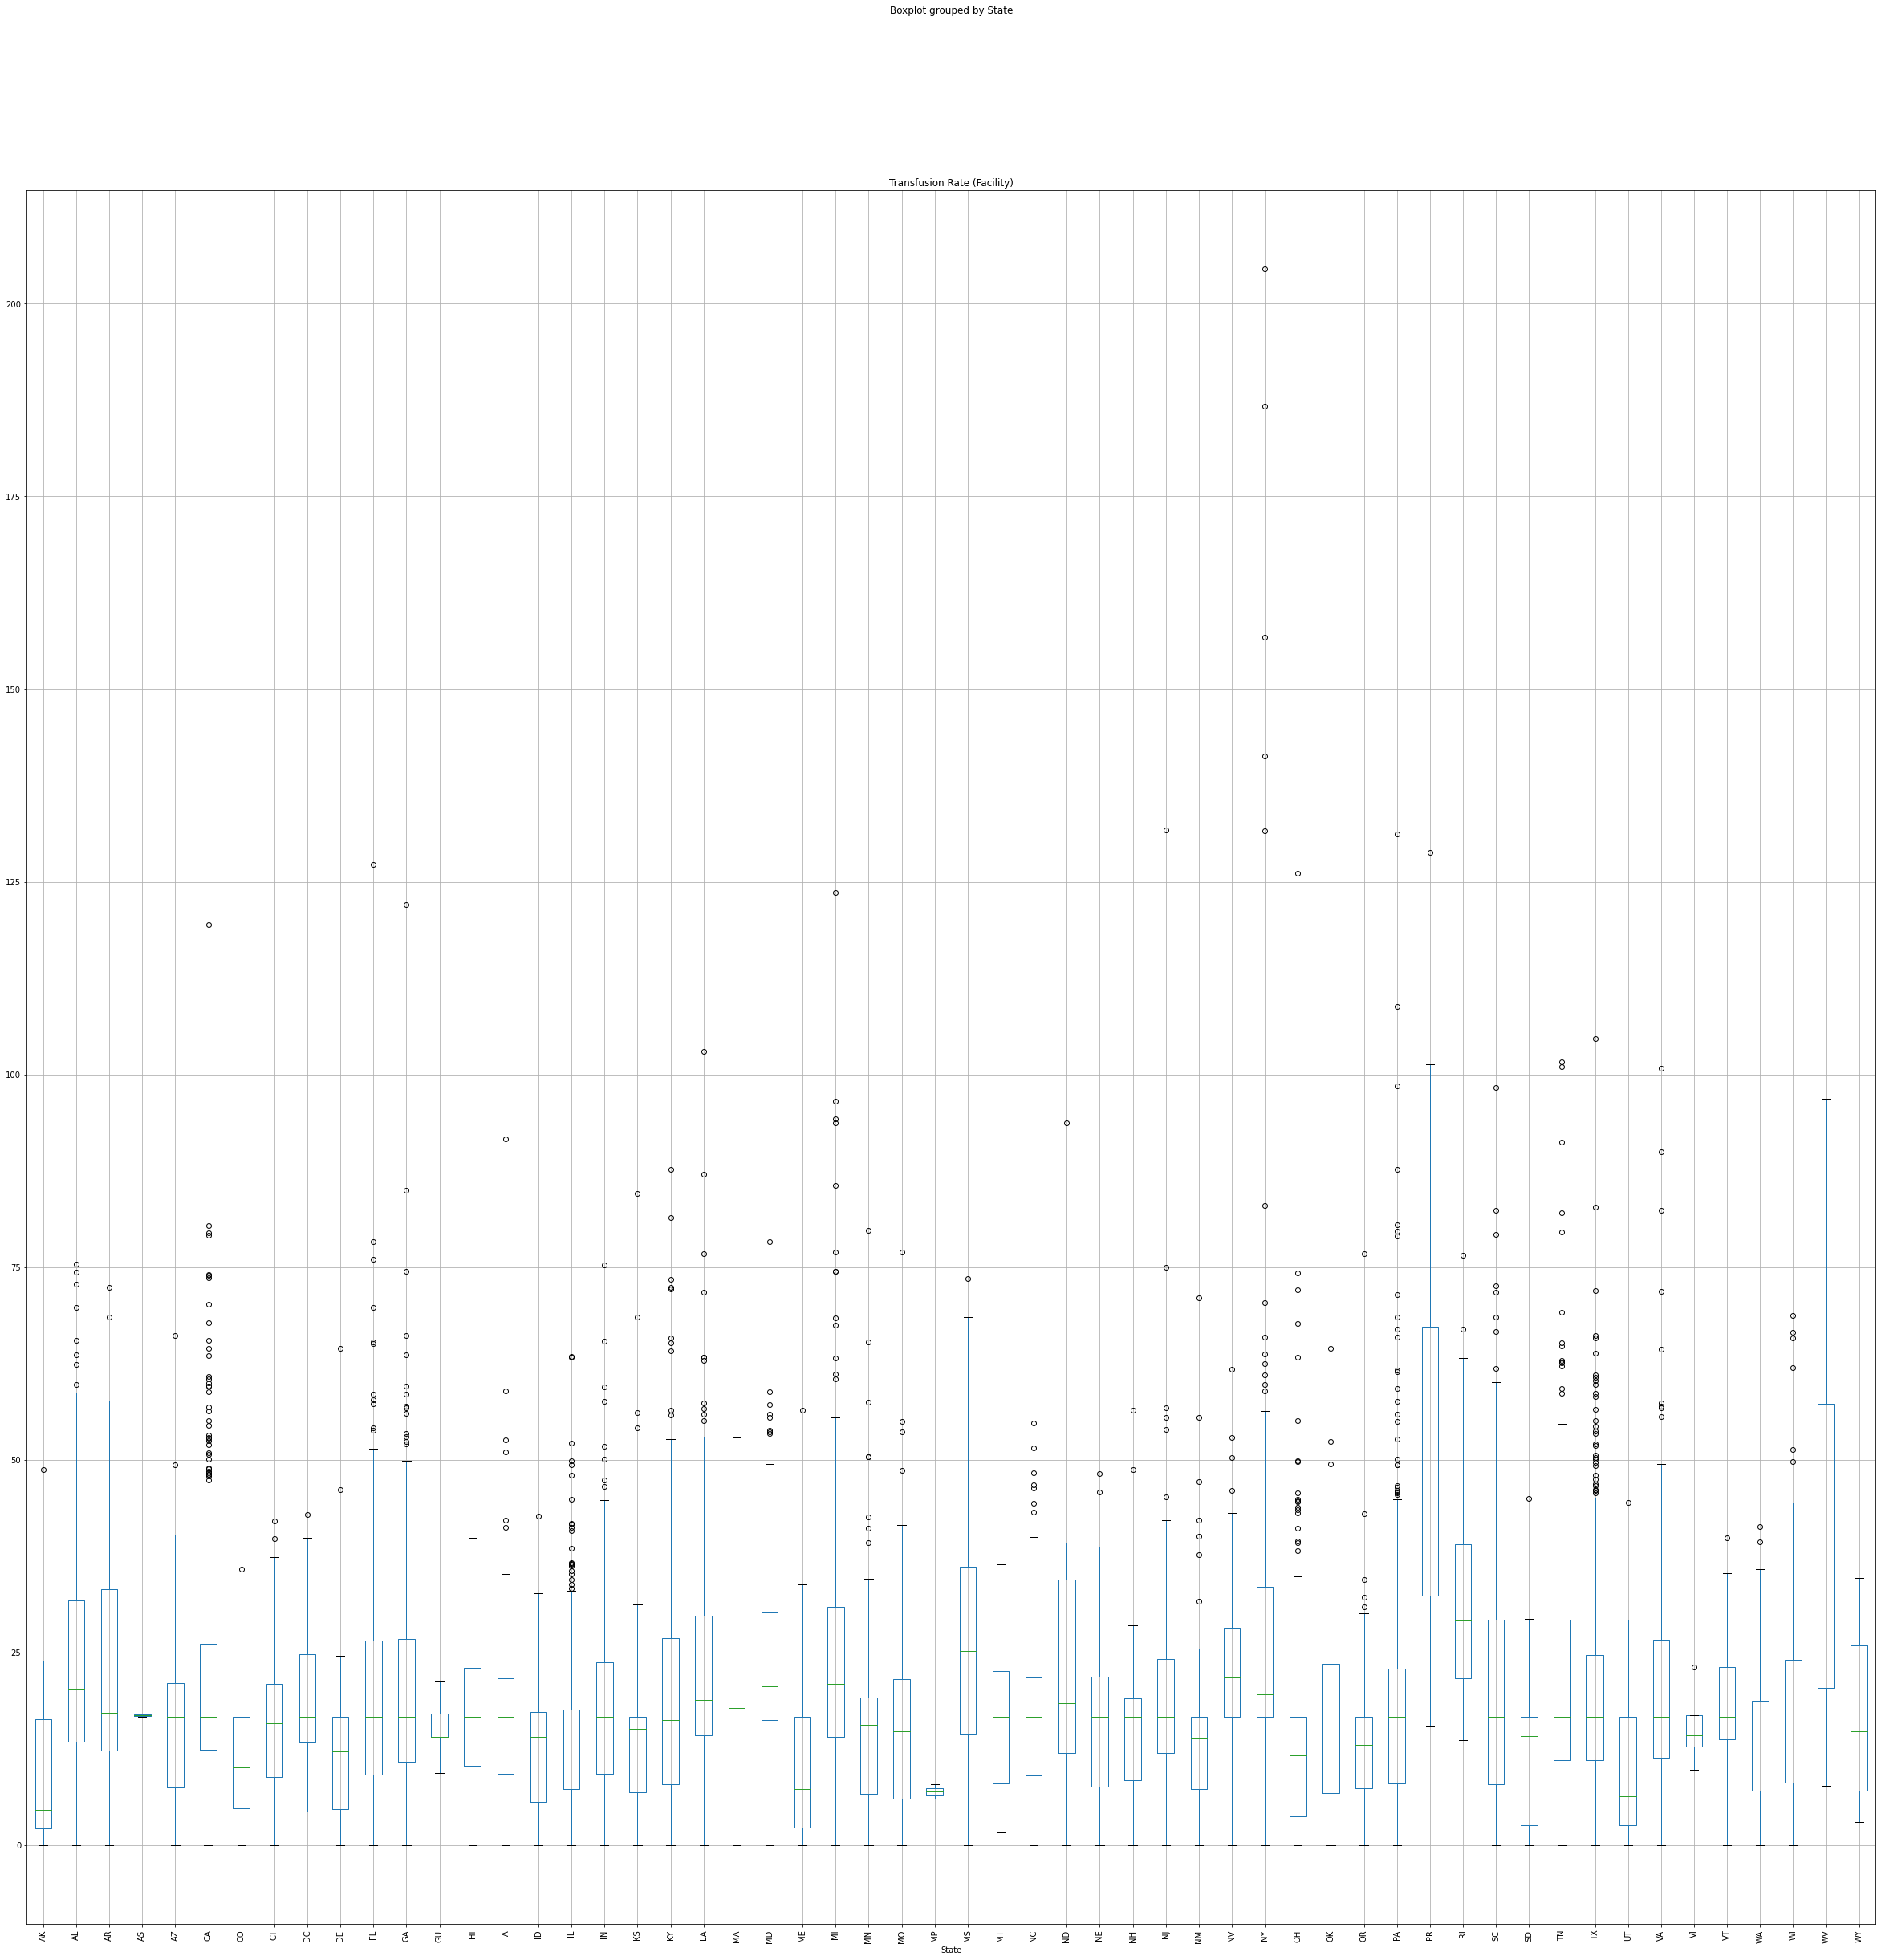

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(40,40))
_ = dialysis.boxplot('Transfusion Rate (Facility)', 'State',  rot=90, ax=ax)

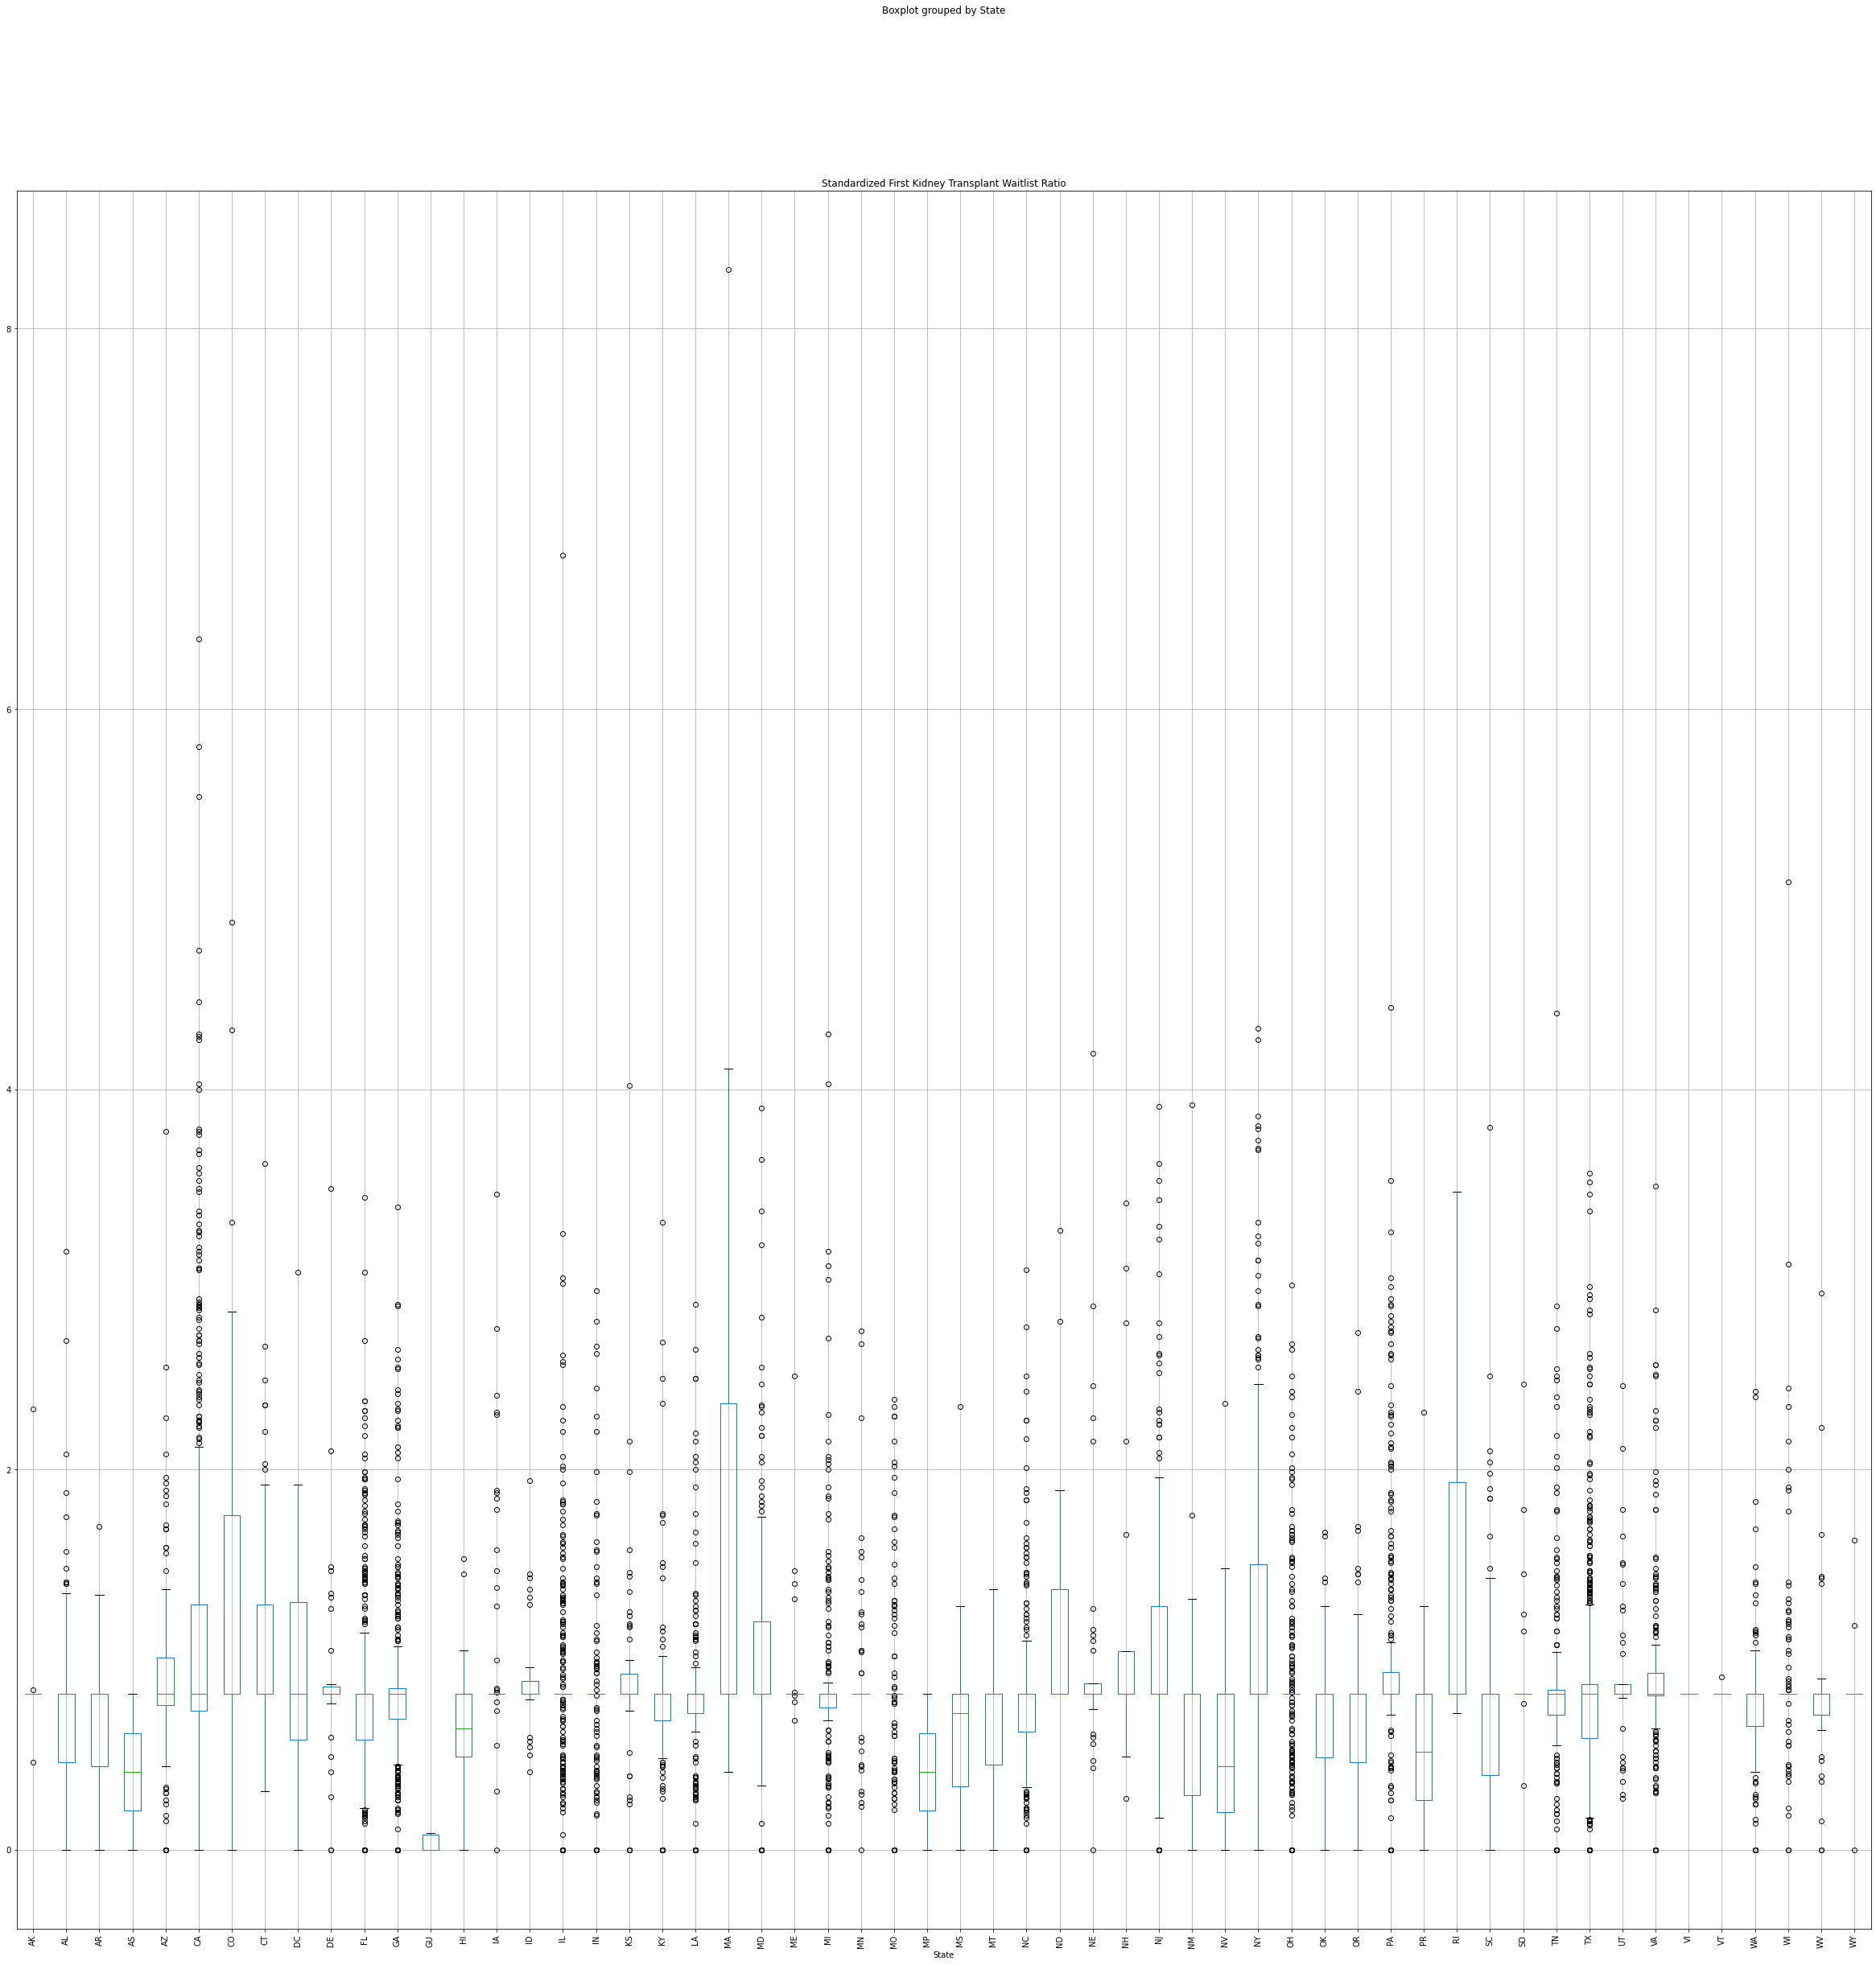

In [40]:
fig, ax = plt.subplots(1, 1, figsize=(40,40))
_ = dialysis.boxplot('Standardized First Kidney Transplant Waitlist Ratio', 'State',  rot=90, ax=ax)

# Take Aways
The columns Percentage Of Adult Patients With Serum Phosphorus levels all appear correlated. Mostly are moderately correlated but the relationship between levels greater than 7.0 mg/dL and between 3.5 - 4.5 mg/dL are highly correlated (-0.71). This relationship should be looked into closer. Also, all the serum phorphorus correlations are negative execpt for between 3.5 - 4.5 mg/dL and less than 3.5 mg/dL, which is moderate, positive correlated (0.4). This should also be looked into further.

Star Rating also has a lot of correlations; not surprisingly since the majority of it's correlations are values that contribute to a center's rating. However, the correlation values differ and it might be interesting to look into what factors are most important in determining a center's rating.


Offers In-Center Hemodialysis & Number of Dialysis Stations have a moderate, positive correlation (0.44) which makes intuitive sense in that larger facilities have more offerings.

Chain Owned and Profit or Non-Profit have a moderate, positive correlation (0.32) where chain owned appear to be more likely to be for profit.

Percent Of Adult HD Patients With Kt/V >= 1.2 has two interesting correlations. It correlates moderate, negative (-0.34) with Percentage Of Adult Patients With Long Term Catheter In Use. Also, it correlates moderate, negative (-0.47) with Percentage Of Adult Patients With Hypercalcemia (Serum Calcium Greater Than 10.2 mg/dL). Considering the parameter Kt/V is a measurement of the efficacy of a hemodialysis session, it makes sense these values would have a negative correlation.

Percentage Of Prevalent Patients Waitlisted & Standardized First Kidney Transplant Waitlist Ratio have a moderate, positive correlation (0.43) which makes intuitive sense. 

Hospitalization Rate (Facility) & Readmission Rate (Facility) also have a moderate, positive correlation (0.42), which again makes intuitive sense.

Overall, it does not appear health factor's differ between states. However, PR (Puerto Rico) does seem to have non-significantly higher boxes than other states.